In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torchvision.transforms import transforms

from tqdm import tqdm

from random import shuffle

## Load Data

In [6]:
file_name = "NIR_all.xlsx"
xl_file = pd.ExcelFile(file_name)
df = xl_file.parse("Sheet1")

In [7]:
df

,Wavelength,PS,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180
0,899.170,0.492981,0.469406,0.488750,0.504353,0.497332,0.536551,0.486938,0.487521,0.517079,...,0.067307,0.066655,0.066655,0.066550,0.068950,0.069000,0.065892,0.060758,0.066536,0.064665
1,900.804,0.493208,0.469555,0.488914,0.504503,0.497471,0.536744,0.487073,0.487698,0.517216,...,0.067254,0.066630,0.066632,0.066515,0.068920,0.068928,0.065806,0.060663,0.066464,0.064639
2,902.437,0.493174,0.469437,0.488759,0.504428,0.497310,0.536525,0.486901,0.487641,0.517089,...,0.067115,0.066508,0.066505,0.066434,0.068814,0.068853,0.065680,0.060570,0.066331,0.064527
3,904.070,0.493437,0.469640,0.488998,0.504659,0.497547,0.536744,0.487165,0.487763,0.517262,...,0.067001,0.066409,0.066396,0.066367,0.068732,0.068766,0.065550,0.060432,0.066219,0.064403
4,905.704,0.493427,0.469462,0.488851,0.504560,0.497456,0.536500,0.487082,0.487694,0.517107,...,0.066846,0.066301,0.066279,0.066290,0.068622,0.068655,0.065452,0.060318,0.066086,0.064298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1709.034,0.301398,0.287640,0.299286,0.309244,0.304741,0.328992,0.300061,0.300025,0.317133,...,0.047696,0.048007,0.048000,0.047515,0.048908,0.050056,0.047503,0.042988,0.047579,0.046373
508,1710.584,0.310216,0.296134,0.308123,0.318373,0.313507,0.338684,0.308682,0.309031,0.326435,...,0.048528,0.048949,0.049123,0.048463,0.050121,0.051292,0.048787,0.044282,0.048619,0.047441
509,1712.133,0.319099,0.304492,0.316978,0.327497,0.322435,0.347909,0.317495,0.317711,0.335575,...,0.049699,0.050118,0.050174,0.049607,0.051781,0.052230,0.050149,0.045562,0.049626,0.048696
510,1713.683,0.324000,0.308994,0.321346,0.332514,0.327160,0.352665,0.322025,0.322478,0.340357,...,0.050519,0.050885,0.051033,0.050309,0.052615,0.052630,0.050854,0.046389,0.050737,0.049350


# Process Data

In [29]:
labels = []
data = []

skip = True
for column in df:
    if skip:
        skip = False
        continue
        
    n_label = df[column].name.split(": ")[0]
    if n_label != "Unnamed":
        label = n_label
    
    labels.append(label)
    data.append(np.array(df[column].values, dtype=np.float32))
    
    
counter = 0
classes = dict()
for l in labels:
    if l not in classes:
        classes[l] = counter
        classes[counter] = l
        counter += 1
        

labels_ohe = np.eye(len(classes) // 2, dtype=np.float32)[[classes[l] for l in labels]]

In [33]:
wavelengths = np.linspace(899.170, 1715.232, data[0].shape[0])

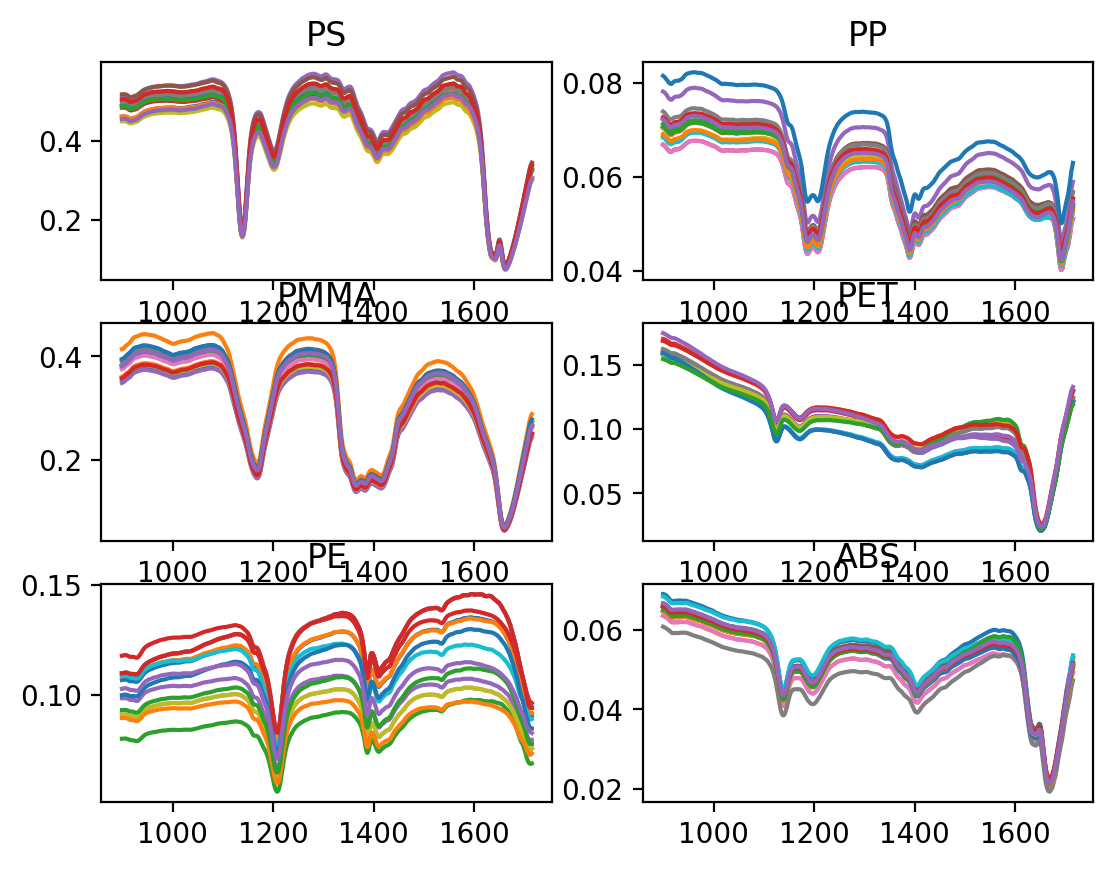

In [98]:
fig, axes = plt.subplots(3,2, dpi=200)
axes = axes.ravel()


for j in range(6):
        
    for k in range(15):
        i = np.random.randint(len(data))
        while labels_ohe[i][j] == 0:
            i = np.random.randint(len(data))

        axes[j].plot(wavelengths, data[i])
        axes[j].set_title(labels[i])


# TensorDataset

In [68]:
data_tensor = torch.tensor(data)
labels_tensor = torch.tensor(np.array([classes[l] for l in labels]))

inds = [i for i in range(len(data))]
# random shuffle
shuffle(inds)

training_tensor = torch.reshape(data_tensor[inds][:-70], (-1, 1, 512))
training_labels = labels_tensor[inds][:-70]

validation_tensor = torch.reshape(data_tensor[inds][-70:], (-1, 1, 512))
validation_labels = labels_tensor[inds][-70:]

training_set = torch.utils.data.TensorDataset(training_tensor, training_labels)
validation_set = torch.utils.data.TensorDataset(validation_tensor, validation_labels)

# Netzwerk

In [69]:
model = 0#

# Training

In [107]:
# Prepare training
batch_size = 4

# Data loaders
train_loader = torch.utils.data.DataLoader(training_set, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=batch_size, drop_last=True)
#test_loader = torch.utils.data.DataLoader(valset, batch_size=batch_size)

# Loss
loss_fn = torch.nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Scheduler for learning rate decay
lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.6, patience=3)

def evaluate(model, loader, loss_fn):
    n = 0
    loss_cum = 0
    acc_cum = 0
    with torch.no_grad():
        for x, y in loader:
            batch_size = len(x)
            pred = model(x)
            loss_cum = loss_cum + loss_fn(pred, y).item() * batch_size
            pred_class = torch.argmax(pred, -1)
            acc_cum = acc_cum + torch.sum(pred_class == y).item()
            n = n + batch_size
    return loss_cum / n, acc_cum / n